In [73]:
# Import packeges from python lib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #ignore warnings

In [74]:
# Load CSV file 'weatherHistory.csv' using pandas
#https://www.kaggle.com/datasets/muthuj7/weather-dataset?select=weatherHistory.csv
df_wehter_Data =  pd.read_csv('weatherHistory.csv')
df_wehter_Data.head()

,FormattedDate,Summary,Precip Type,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars),DailySummary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [75]:
# Checking for unique value in dataframe
df_wehter_Data.nunique()

FormattedDate            96429
Summary                     27
Precip Type                  2
TemperatureC              7574
ApparentTemperatureC      8984
Humidity                    90
WindSpeed(km/h)           2484
Wind Bearing(degrees)      360
Visibility(km)             949
Loud Cover                   1
Pressure(millibars)       4979
DailySummary               214
dtype: int64

In [76]:
# calculate null value in data
df_wehter_Data.isna().sum()

FormattedDate              0
Summary                    0
Precip Type              517
TemperatureC               0
ApparentTemperatureC       0
Humidity                   0
WindSpeed(km/h)            0
Wind Bearing(degrees)      0
Visibility(km)             0
Loud Cover                 0
Pressure(millibars)        0
DailySummary               0
dtype: int64

In [77]:
# Replace a null value with rain precip type
df_wehter_Data['Precip Type'].fillna("rain", inplace=True)
df_wehter_Data.isna().sum()

FormattedDate            0
Summary                  0
Precip Type              0
TemperatureC             0
ApparentTemperatureC     0
Humidity                 0
WindSpeed(km/h)          0
Wind Bearing(degrees)    0
Visibility(km)           0
Loud Cover               0
Pressure(millibars)      0
DailySummary             0
dtype: int64

In [78]:
# Return datatype of each column
df_wehter_Data.dtypes

FormattedDate             object
Summary                   object
Precip Type               object
TemperatureC             float64
ApparentTemperatureC     float64
Humidity                 float64
WindSpeed(km/h)          float64
Wind Bearing(degrees)      int64
Visibility(km)           float64
Loud Cover                 int64
Pressure(millibars)      float64
DailySummary              object
dtype: object

In [79]:
# change type of Formated date column in dataframe from object to datatime.
df_wehter_Data['FormattedDate'] = pd.to_datetime(df_wehter_Data.FormattedDate, format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)
df_wehter_Data.dtypes

FormattedDate            datetime64[ns, UTC]
Summary                               object
Precip Type                           object
TemperatureC                         float64
ApparentTemperatureC                 float64
Humidity                             float64
WindSpeed(km/h)                      float64
Wind Bearing(degrees)                  int64
Visibility(km)                       float64
Loud Cover                             int64
Pressure(millibars)                  float64
DailySummary                          object
dtype: object

In [80]:
# Split year from datetime
df_wehter_Data['Year'] = df_wehter_Data['FormattedDate'].dt.year
grp_weather_data = df_wehter_Data.groupby('Year', as_index=False).mean() # group data by year calculate average
grp_weather_data.head(20)

,Year,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars)
0,2005,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000
1,2006,11.215225,10.158189,0.767349,10.189128,189.339726,9.757280,0.0,992.545486
2,2007,12.134677,11.062986,0.689647,10.824162,194.106393,10.408192,0.0,1001.639412
3,2008,12.161819,11.053128,0.701239,11.304172,193.860997,10.266882,0.0,1007.734488
4,2009,12.269682,11.070866,0.707247,11.507326,180.477740,10.002187,0.0,1002.605055
5,2010,11.200176,10.097002,0.796861,11.014343,192.078780,9.140282,0.0,1004.815439
6,2011,11.524934,10.584490,0.736008,9.898596,189.334475,9.508237,0.0,1014.183506
7,2012,11.986824,10.753117,0.689513,11.264745,187.746926,10.362670,0.0,999.341404
8,2013,11.941017,10.825509,0.754197,10.970036,187.862557,10.892672,0.0,1004.951297
9,2014,12.528228,11.627649,0.748571,10.501276,178.241064,11.320400,0.0,987.277688


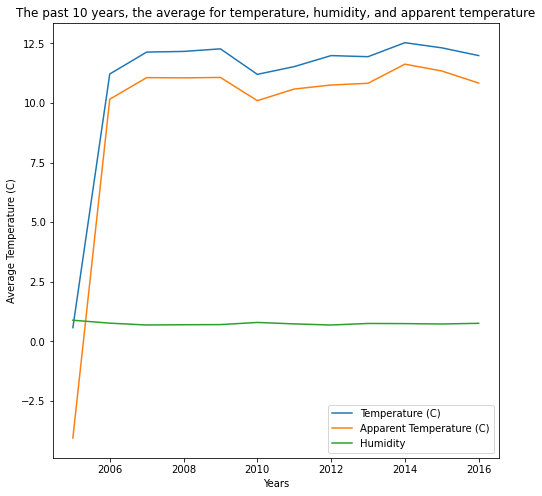

In [81]:
# ploting a Temperature, Humidity and Apparent Temperature over last 10 year' 
plt.figure(figsize=(8,8))
plt.plot(grp_weather_data['Year'],grp_weather_data['TemperatureC'], label = 'Temperature (C)')
plt.plot(grp_weather_data['Year'],grp_weather_data['ApparentTemperatureC'], label = 'Apparent Temperature (C)')
plt.plot(grp_weather_data['Year'],grp_weather_data['Humidity'], label = 'Humidity')
plt.legend()
plt.title('The past 10 years, the average for temperature, humidity, and apparent temperature')
plt.xlabel('Years')
plt.ylabel('Average Temperature (C)')
plt.savefig('1_average_tempreture.jpg')
plt.show()


In [82]:
# Slice data between 2007 and 2010 years
specific_year_weather_type = df_wehter_Data.query('Year >= 2007 and Year <= 2010')

# Count Type of weather/Summary and reset index
count_weather_Type = specific_year_weather_type['Summary'].value_counts().reset_index()  

# indexing a new column name
count_weather_Type.columns = ['Type of Weather', 'Count']  
count_weather_Type.head(10)

,Type of Weather,Count
0,Partly Cloudy,11875
1,Mostly Cloudy,9743
2,Overcast,5993
3,Clear,4126
4,Foggy,2577
5,Breezy and Mostly Cloudy,216
6,Breezy and Overcast,202
7,Breezy and Partly Cloudy,184
8,Windy and Partly Cloudy,38
9,Dry and Partly Cloudy,31


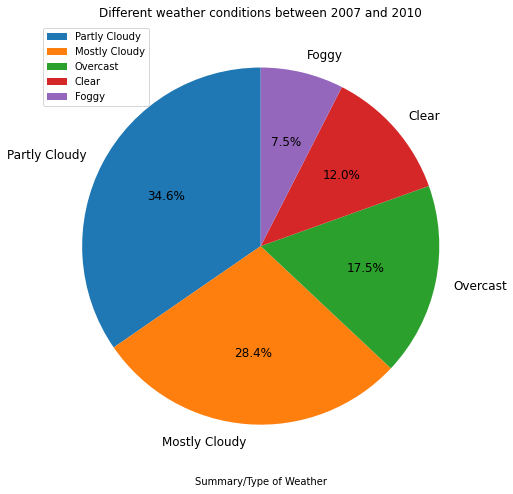

In [83]:
# ploting a value in pie chart
plt.figure(figsize=(8,9)).set_facecolor('white')
plt.pie(count_weather_Type['Count'].head(5), labels=count_weather_Type['Type of Weather'].head(5), startangle=90, autopct='%1.1f%%', textprops={'fontweight':'normal','fontsize': 12,})
plt.legend(loc = 2,bbox_to_anchor=(0, 0, 0.5, 1))
plt.title('Different weather conditions between 2007 and 2010')
plt.xlabel('Summary/Type of Weather')
plt.savefig('2_Different_condition.jpg')
plt.show()


In [84]:
# seperate data by year 2012
df_year_2012_db = df_wehter_Data.query('Year == 2012')
df_year_2012_db['Months'] = df_year_2012_db['FormattedDate'].dt.month_name() # split a months from dateTime
df_year_2012_db.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_23268\4112406200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2012_db['Months'] = df_year_2012_db['FormattedDate'].dt.month_name() # split a months from dateTime


,FormattedDate,Summary,Precip Type,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars),DailySummary,Year,Months
52608,2012-03-31 22:00:00+00:00,Breezy and Overcast,rain,9.444444,5.511111,0.52,35.4200,340,16.1000,0,1002.80,Partly cloudy until evening and breezy in the ...,2012,March
52609,2012-03-31 23:00:00+00:00,Mostly Cloudy,rain,8.333333,5.194444,0.45,20.9300,320,16.1000,0,1004.10,Partly cloudy until evening and breezy in the ...,2012,March
52610,2012-04-01 00:00:00+00:00,Breezy and Mostly Cloudy,rain,6.855556,2.244444,0.54,33.2304,322,15.1501,0,1004.97,Partly cloudy until evening and breezy in the ...,2012,April
52611,2012-04-01 01:00:00+00:00,Mostly Cloudy,rain,6.111111,1.888889,0.57,25.7600,310,16.1000,0,1005.90,Partly cloudy until evening and breezy in the ...,2012,April
52612,2012-04-01 02:00:00+00:00,Breezy and Overcast,rain,6.111111,1.605556,0.51,28.9800,310,16.1000,0,1006.00,Partly cloudy until evening and breezy in the ...,2012,April


In [85]:
# Group by months and calculate average / mean 
grp_by_Months = df_year_2012_db.groupby(['Months'], as_index = False).mean()
grp_by_Months.head(10)

,Months,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibars),Year
0,April,12.591088,11.782770,0.650222,12.827094,190.093056,11.210408,0.0,1003.945736,2012.0
1,August,23.675037,23.384334,0.500081,9.253929,193.202957,11.865808,0.0,989.841559,2012.0
2,December,-0.294728,-3.672909,0.886801,12.477911,180.516129,7.202088,0.0,1012.560968,2012.0
3,February,-5.136454,-8.817241,0.762859,11.569839,188.433908,7.165194,0.0,1022.414856,2012.0
4,January,1.133901,-1.965211,0.797581,12.699156,217.038978,9.773652,0.0,1018.955968,2012.0
5,July,24.560260,24.525343,0.580860,10.948931,183.793011,11.589944,0.0,990.851465,2012.0
6,June,22.209113,22.157130,0.622306,10.408136,194.069444,11.896201,0.0,904.278014,2012.0
7,March,7.821580,6.591502,0.535941,11.628138,197.838710,11.541320,0.0,1018.472823,2012.0
8,May,17.159282,16.985596,0.672863,10.711780,170.319892,11.842957,0.0,981.389449,2012.0
9,November,7.908573,6.608133,0.871389,11.657563,152.270833,8.645857,0.0,1018.053806,2012.0


In [86]:
# Convert a months, windSpeed, Visibility column to numpy array
months_arr = grp_by_Months['Months'].to_numpy()
windSpeed_arr = grp_by_Months['WindSpeed(km/h)'].to_numpy()
visiblity_arr = grp_by_Months['Visibility(km)'].to_numpy()

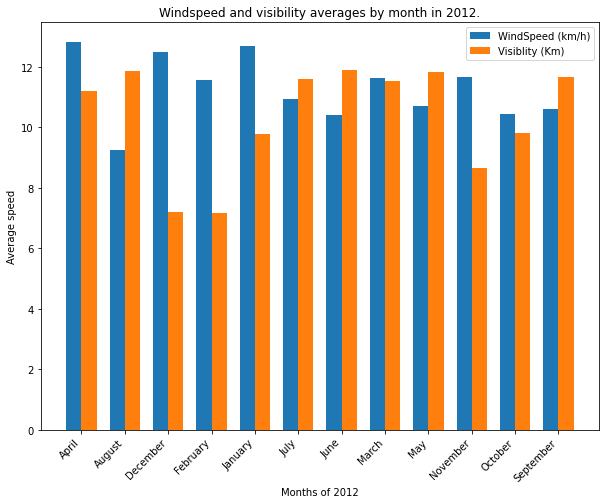

In [87]:
# Plot a value in bar graph
width = 0.35
n = len(months_arr)
x = np.arange(n)
plt.figure(figsize=(10,7.5))
ax = plt.subplot()
ax.bar(x, windSpeed_arr, width, label='WindSpeed (km/h)')
ax.bar(x + width, visiblity_arr, width, label='Visiblity (Km)')
plt.xticks(x + width / 2, months_arr)
plt.title('Windspeed and visibility averages by month in 2012.')
plt.ylabel('Average speed')
plt.xlabel('Months of 2012')
plt.legend()

#x axis label roation
plt.setp(plt.gca().get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.savefig('3_average_wind_speed.jpg')
plt.show()

In [88]:
# Copy selected columns from df_weather_data datafrom for ploting histogram
df_wehter_Data_hist = df_wehter_Data[['TemperatureC', 'ApparentTemperatureC', 'Humidity', 'WindSpeed(km/h)','Wind Bearing(degrees)', 'Visibility(km)', 'Pressure(millibars)']]
df_wehter_Data_hist.head()

,TemperatureC,ApparentTemperatureC,Humidity,WindSpeed(km/h),Wind Bearing(degrees),Visibility(km),Pressure(millibars)
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


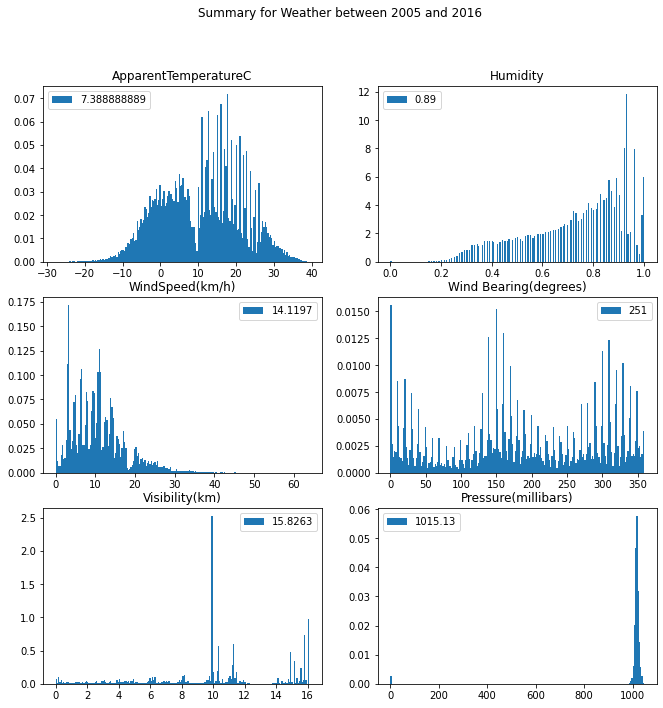

In [89]:
# Ploting a histogram
fig = plt.figure(figsize=(11,11))

#Create a column list to plot name and title for histogram
column_list = list(df_wehter_Data_hist.iloc[:0])
length = len(column_list)
i = 1

# Loop to plot subplot for sepcific column
while i < length:
    plt.subplot(3,2,i)
    plt.hist(df_wehter_Data_hist[column_list[i]], density=True, bins=200, label=df_wehter_Data_hist[column_list[i]])
    plt.title(column_list[i])
    plt.legend()
    i+=1

plt.suptitle('Summary for Weather between 2005 and 2016')
plt.savefig('4_Histogram_weather.jpg')
plt.show()